      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09      230

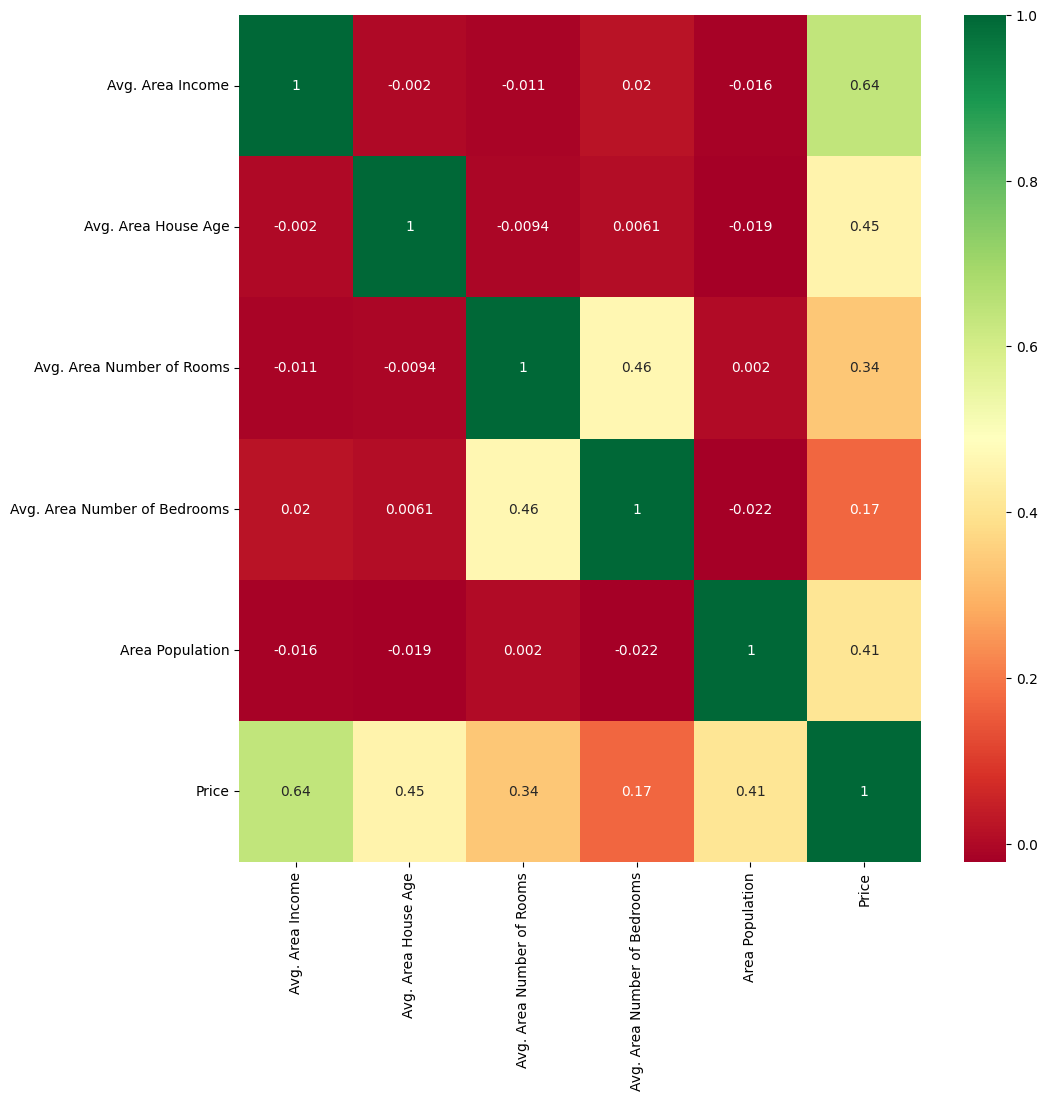

Selected features are: Index(['Price'], dtype='object')
Mean Squared Error: 1.3369059819693524e-19
R-squared: 1.0


In [1]:
#python code save on model.py
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load your dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('C:\\Users\\manik\\Desktop\\New folder (3)\\house.csv')
print(data)
# Feature selection
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11, 11))
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()
threshold = 0.4
selected_features = corrmat.columns[corrmat.abs().mean() > threshold]
print("Selected features are:", selected_features)

# Split the data into training and testing sets
X = data[selected_features]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Save the trained model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Later, you can load the model and use it for predictions
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)






In [ ]:
#backend flask code save app.py
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

from flask import Flask, render_template, request
import pymongo

In [11]:
app = Flask(__name__)

# Load your dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('C:\\Users\\manik\\Desktop\\New folder (3)\\house.csv')

In [12]:
# Feature selection
corrmat = data.corr()
top_corr_features = corrmat.index
threshold = 0.1
selected_features = corrmat.columns[corrmat.abs().mean() > threshold]
print("Selected features are:", selected_features)

Selected features are: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [13]:
# Split the data into training and testing sets
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10089009299.499456
R-squared: 0.9179971706985317


In [16]:
# Save the trained model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
# Set up the MongoDB connection
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['HOME']  # Replace 'your_database_name' with your actual database name
collection = db["PREDICTION"]
# Define a route for rendering the HTML form
@app.route('/')
def index():
    return render_template('index.html')

# Define a route for handling the form submission and storing data in MongoDB
@app.route('/predict', methods=['POST'])
def predict():
    # Extract input data from the form
    income = float(request.form['income'])
    house_age = float(request.form['house_age'])
    num_rooms = float(request.form['num_rooms'])
    num_bedrooms = float(request.form['num_bedrooms'])
    population = float(request.form['population'])

    # Perform your prediction using the machine learning model
    input_data = [[income, house_age, num_rooms, num_bedrooms, population]]
    predicted_price = model.predict(input_data)[0]

    # Save the prediction data to MongoDB
    prediction_data = {
        'income': income,
        'house_age': house_age,
        'num_rooms': num_rooms,
        'num_bedrooms': num_bedrooms,
        'population': population,
        'predicted_price': predicted_price
    }

    
    collection.insert_one(prediction_data)

    # Render the result page with the prediction result
    return render_template('result.html', predicted_price=predicted_price)
if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
save the index.html 

<!DOCTYPE html>
<html>
<head>
    <title>House Price Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f5f5f5;
        }

        h1 {
            text-align: center;
            margin-top: 20px;
            color: #333;
        }

        form {
            width: 80%;
            margin: 0 auto;
            background-color: #fff;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
        }

        label {
            display: block;
            margin: 10px 0;
            font-weight: bold;
        }

        input[type="number"] {
            width: 100%;
            padding: 10px;
            margin: 5px 0;
            border: 1px solid #ccc;
            border-radius: 5px;
        }

        input[type="submit"] {
            background-color: #0073e6;
            color: #fff;
            padding: 10px 20px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }

        input[type="submit"]:hover {
            background-color: #005bb9;
        }
    </style>
</head>
<body>
    <h1>House Price Prediction</h1>
    <form method="POST" action="/predict">
        <label for="Area Income">Avg. Area Income:</label>
        <input type="number" name="income" id="Area Income" required>
        
        <label for="Area House Age">Avg. Area House Age:</label>
        <input type="number" name="house_age" id="Area House Age" required>
        
        <label for="Area Number of Rooms">Avg. Area Number of Rooms:</label>
        <input type="number" name="num_rooms" id="Area Number of Rooms" required>
        
        <label for="Area Number of Bedrooms">Avg. Area Number of Bedrooms:</label>
        <input type="number" name="num_bedrooms" id="Area Number of Bedrooms" required>
        
        <label for="Area Population">Area Population:</label>
        <input type="number" name="population" id="Area Population" required>
        
        <input type="submit" value="Predict">
    </form>
</body>
</html>


In [ ]:
result.html 

<!DOCTYPE html>
<html>
<head>
    <title>House Price Prediction Result</title>
    <style>
        /* Apply styles to the container */
        .container {
            text-align: center;
            background-color: #f0f0f0;
            padding: 20px;
            margin: 0 auto;
            width: 80%;
        }
        
        /* Style for the heading */
        .heading {
            font-size: 24px;
            color: #333;
            margin-top: 10px;
        }
        
        /* Style for the prediction text */
        .prediction {
            font-size: 18px;
            color: #0073e6;
            margin-top: 20px;
        }
        
        /* Style for the buttons */
        .btn {
            display: inline-block;
            padding: 10px 20px;
            background-color: #0073e6;
            color: #fff;
            text-decoration: none;
            margin: 20px;
            border-radius: 5px;
            font-weight: bold;
        }
        
        /* Hover effect for buttons */
        .btn:hover {
            background-color: #005bb9;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1 class="heading">House Price Prediction Result</h1>
        <p class="prediction">Predicted House Price: ${{ predicted_price }}</p>
        
    </div>
    <p><a href="http://127.0.0.1:5000">Go back to the homepage</a></p>
</body>
</html>


In [ ]:
# create templates save html files